In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/AirQuality_Data.csv")

In [3]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [4]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


## Cleaning

In [6]:
data.corr()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.003072,0.003738,-0.244322,-0.037048,0.007302,-0.094445,-0.119090,0.172940,-0.088871,0.008396,-0.003583
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.006920,0.004606,-0.193675,-0.062101,-0.011209,-0.064482,-0.148878,0.173713,-0.151824,0.004372,0.027663
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.015259,-0.005943,-0.187721,0.108640,0.071386,-0.113223,0.132572,-0.021172,0.265387,0.016551,-0.126916
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.002521,0.023783,-0.000101,-0.005965,-0.012875,-0.004705,0.015850,0.018167,0.020019,-0.006632,-0.009686
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.001827,0.027770,-0.010701,-0.074505,-0.037249,0.286357,0.142116,-0.039081,-0.019910,0.005099,0.156612
PM2.5,-0.003072,-6.920351e-03,1.525915e-02,2.520603e-03,-1.827454e-03,1.000000,0.890038,0.547325,0.693271,0.801831,-0.137855,-0.138886,-0.006025,0.129493,-0.019292,-0.301514
PM10,0.003738,4.605837e-03,-5.942927e-03,2.378268e-02,2.777011e-02,0.890038,1.000000,0.493884,0.658130,0.719311,-0.126959,-0.133760,-0.016181,0.062407,-0.031430,-0.198901
SO2,-0.244322,-1.936746e-01,-1.877213e-01,-1.005245e-04,-1.070146e-02,0.547325,0.493884,1.000000,0.506688,0.582002,-0.157093,-0.338938,0.205729,-0.228545,-0.045426,-0.168864
NO2,-0.037048,-6.210086e-02,1.086399e-01,-5.964988e-03,-7.450457e-02,0.693271,0.658130,0.506688,1.000000,0.712110,-0.464226,-0.257156,0.088765,0.054902,-0.043926,-0.497729
CO,0.007302,-1.120865e-02,7.138613e-02,-1.287543e-02,-3.724867e-02,0.801831,0.719311,0.582002,0.712110,1.000000,-0.294112,-0.306932,0.134724,-0.002951,-0.013202,-0.346954


In [7]:
data = data.drop(['No','month', 'day', 'hour', 'PRES','RAIN'], axis = 1)
#dropped these due to low correlation with PM2.5 

###imputing missing values

In [8]:
data.isnull().sum()

year          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
DEWP         20
wd           78
WSPM         14
station       0
dtype: int64

###Chemicals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


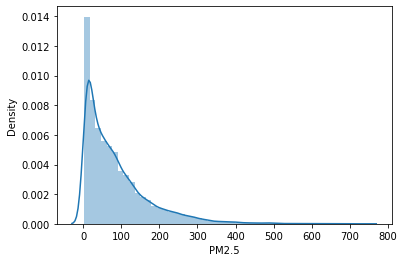

In [9]:
sns.distplot(data['PM2.5'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


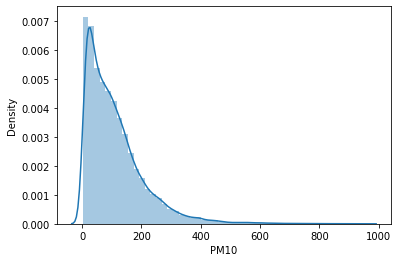

In [10]:
sns.distplot(data['PM10'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


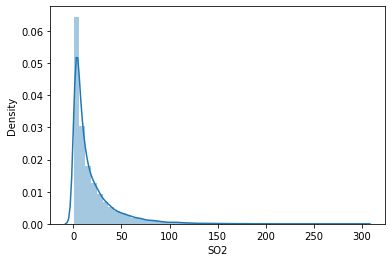

In [11]:
sns.distplot(data['SO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


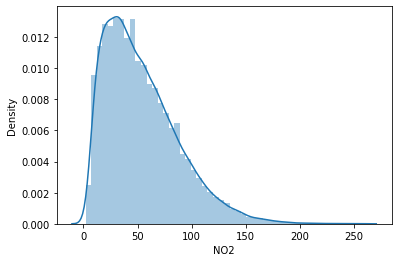

In [12]:
sns.distplot(data['NO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


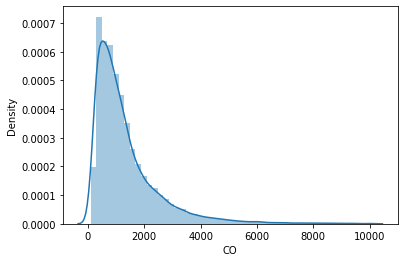

In [13]:
sns.distplot(data['CO'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


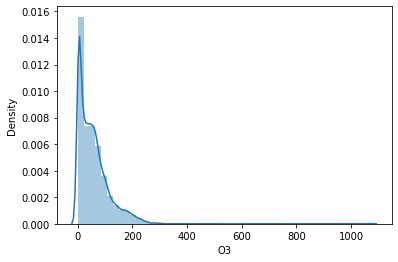

In [14]:
sns.distplot(data['O3'])

In [15]:
data.corr()

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,WSPM
year,1.000000,-0.006920,0.004606,-0.193675,-0.062101,-0.011209,-0.064482,-0.148878,-0.151824,0.027663
PM2.5,-0.006920,1.000000,0.890038,0.547325,0.693271,0.801831,-0.137855,-0.138886,0.129493,-0.301514
PM10,0.004606,0.890038,1.000000,0.493884,0.658130,0.719311,-0.126959,-0.133760,0.062407,-0.198901
SO2,-0.193675,0.547325,0.493884,1.000000,0.506688,0.582002,-0.157093,-0.338938,-0.228545,-0.168864
NO2,-0.062101,0.693271,0.658130,0.506688,1.000000,0.712110,-0.464226,-0.257156,0.054902,-0.497729
CO,-0.011209,0.801831,0.719311,0.582002,0.712110,1.000000,-0.294112,-0.306932,-0.002951,-0.346954
O3,-0.064482,-0.137855,-0.126959,-0.157093,-0.464226,-0.294112,1.000000,0.582228,0.306157,0.290830
TEMP,-0.148878,-0.138886,-0.133760,-0.338938,-0.257156,-0.306932,0.582228,1.000000,0.819070,0.048835
DEWP,-0.151824,0.129493,0.062407,-0.228545,0.054902,-0.002951,0.306157,0.819070,1.000000,-0.278933
WSPM,0.027663,-0.301514,-0.198901,-0.168864,-0.497729,-0.346954,0.290830,0.048835,-0.278933,1.000000


In [16]:
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())

In [17]:
data['PM10'] = data['PM10'].fillna(data['PM10'].median())

In [18]:
data['SO2'] = data['SO2'].fillna(data['SO2'].median())

In [19]:
data['NO2'] = data['NO2'].fillna(data['NO2'].median())

In [20]:
data['CO'] = data['CO'].fillna(data['CO'].median())

In [21]:
data['O3'] = data['O3'].fillna(data['O3'].median())

In [22]:
data.isnull().sum()

year        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       20
DEWP       20
wd         78
WSPM       14
station     0
dtype: int64

####other varaibles

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


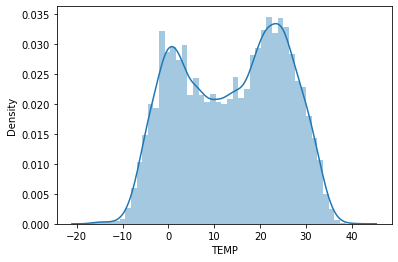

In [23]:
sns.distplot(data['TEMP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


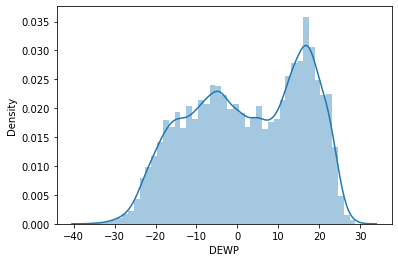

In [24]:
sns.distplot(data.DEWP)

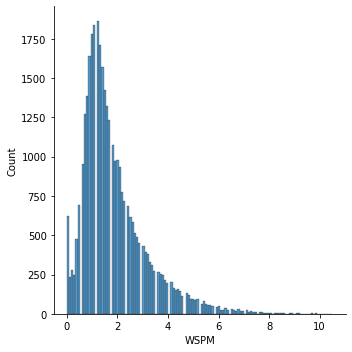

In [25]:
sns.displot(data.WSPM)

In [26]:
data['TEMP'] = data['TEMP'].fillna(data['TEMP'].median())
data['DEWP'] = data['DEWP'].fillna(data['DEWP'].median())
data['WSPM'] = data['WSPM'].fillna(data['WSPM'].median())

In [27]:
data.isnull().sum()

year        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
DEWP        0
wd         78
WSPM        0
station     0
dtype: int64

In [28]:
data.corr()

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,WSPM
year,1.000000,-0.008840,0.002834,-0.192134,-0.059150,0.017748,-0.064904,-0.148696,-0.151675,0.027487
PM2.5,-0.008840,1.000000,0.887443,0.543344,0.667180,0.764205,-0.136436,-0.139961,0.124789,-0.298801
PM10,0.002834,0.887443,1.000000,0.491476,0.641924,0.693987,-0.125781,-0.134251,0.059810,-0.197437
SO2,-0.192134,0.543344,0.491476,1.000000,0.446630,0.551584,-0.155468,-0.338108,-0.229383,-0.166862
NO2,-0.059150,0.667180,0.641924,0.446630,1.000000,0.665454,-0.457271,-0.244191,0.056192,-0.485996
CO,0.017748,0.764205,0.693987,0.551584,0.665454,1.000000,-0.279836,-0.296547,-0.011924,-0.326660
O3,-0.064904,-0.136436,-0.125781,-0.155468,-0.457271,-0.279836,1.000000,0.574126,0.300579,0.288396
TEMP,-0.148696,-0.139961,-0.134251,-0.338108,-0.244191,-0.296547,0.574126,1.000000,0.819070,0.048829
DEWP,-0.151675,0.124789,0.059810,-0.229383,0.056192,-0.011924,0.300579,0.819070,1.000000,-0.278890
WSPM,0.027487,-0.298801,-0.197437,-0.166862,-0.485996,-0.326660,0.288396,0.048829,-0.278890,1.000000


###Encoding the wd object

In [29]:
dataE = pd.get_dummies(data[['year', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'wd',
       'WSPM', 'station']], drop_first = True)

In [30]:
dataE.isnull().sum()

year      0
PM2.5     0
PM10      0
SO2       0
NO2       0
CO        0
O3        0
TEMP      0
DEWP      0
WSPM      0
wd_ENE    0
wd_ESE    0
wd_N      0
wd_NE     0
wd_NNE    0
wd_NNW    0
wd_NW     0
wd_S      0
wd_SE     0
wd_SSE    0
wd_SSW    0
wd_SW     0
wd_W      0
wd_WNW    0
wd_WSW    0
dtype: int64

In [31]:
dataE.corr()

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,WSPM,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
year,1.000000,-0.008840,0.002834,-0.192134,-0.059150,0.017748,-0.064904,-0.148696,-0.151675,0.027487,...,0.004440,0.041890,-0.015452,-0.002970,-0.028058,-0.011723,0.047542,-0.020677,-0.024387,-0.020485
PM2.5,-0.008840,1.000000,0.887443,0.543344,0.667180,0.764205,-0.136436,-0.139961,0.124789,-0.298801,...,-0.119149,-0.163233,0.021055,0.053619,0.037436,0.000650,-0.019981,-0.026519,-0.094871,-0.027707
PM10,0.002834,0.887443,1.000000,0.491476,0.641924,0.693987,-0.125781,-0.134251,0.059810,-0.197437,...,-0.107126,-0.116741,0.018011,0.049267,0.036174,0.000103,-0.000519,-0.021760,-0.070160,-0.017009
SO2,-0.192134,0.543344,0.491476,1.000000,0.446630,0.551584,-0.155468,-0.338108,-0.229383,-0.166862,...,-0.073559,-0.109031,0.014824,0.038669,0.026128,0.002564,-0.017174,-0.011448,-0.070470,-0.012838
NO2,-0.059150,0.667180,0.641924,0.446630,1.000000,0.665454,-0.457271,-0.244191,0.056192,-0.485996,...,-0.120446,-0.189474,-0.026093,0.031462,-0.000837,-0.063344,-0.072871,0.004044,-0.097027,-0.033935
CO,0.017748,0.764205,0.693987,0.551584,0.665454,1.000000,-0.279836,-0.296547,-0.011924,-0.326660,...,-0.106333,-0.150123,-0.005736,0.035730,0.010105,-0.044997,-0.052501,-0.021210,-0.083196,-0.046930
O3,-0.064904,-0.136436,-0.125781,-0.155468,-0.457271,-0.279836,1.000000,0.574126,0.300579,0.288396,...,-0.014944,0.005836,0.131363,0.052465,0.102803,0.180578,0.153235,-0.022106,-0.006185,0.048146
TEMP,-0.148696,-0.139961,-0.134251,-0.338108,-0.244191,-0.296547,0.574126,1.000000,0.819070,0.048829,...,-0.065880,-0.085292,0.100124,0.044263,0.081893,0.132362,0.099034,-0.000325,-0.018580,0.046906
DEWP,-0.151675,0.124789,0.059810,-0.229383,0.056192,-0.011924,0.300579,0.819070,1.000000,-0.278890,...,-0.133449,-0.198130,0.071085,0.061506,0.069494,0.068134,0.020698,-0.012380,-0.098609,0.002603
WSPM,0.027487,-0.298801,-0.197437,-0.166862,-0.485996,-0.326660,0.288396,0.048829,-0.278890,1.000000,...,0.149870,0.317414,-0.033870,-0.062279,-0.051821,0.029014,0.086550,-0.028055,0.194544,0.029532


## Splitting data (Train/Test)

#### Selecting X & Y variable

In [32]:
X = dataE[['PM10']]
y = dataE[['PM2.5']]

### Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
RF = regressor.fit(X_train, y_train)

####Score

In [35]:
y_pred = regressor.predict(X_test)

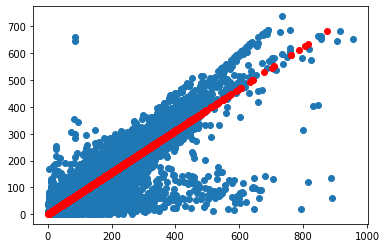

In [36]:
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_pred, color="red")

Bellow show how well the linear regression fits the line

In [37]:
LR_S1 = RF.score(X_train, y_train)
#Train
LR_S1

0.785320015632156

In [38]:
LR_S2 = RF.score(X_test, y_test)
#Test
LR_S2

0.7969782556781813

In [39]:
LRMSE = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
print(LRMSE)

37.597761823284095


### Stochastic Gradient Descent

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [41]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol = 1e-3,eta0 = 0.05))
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(eta0=0.05))])

In [42]:
GD1 = reg.score(X_train,y_train)
print(GD1)

0.7847567999507954


In [43]:
GD2 = reg.score(X_test, y_test)
print(GD2)

0.7968712098302975


In [44]:
y_pred_SGD = reg.predict(X_test)
RMSE = mean_squared_error(y_true = y_test,y_pred=y_pred_SGD, squared = False)
print(RMSE)

37.60767247085885


### Multivariable Regression

In [45]:
X = dataE.drop(['PM2.5'], axis=1)
y = dataE['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Ridge Regression

In [46]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 2, max_iter = 1000, tol = 0.5)

Training

In [47]:
RidgeModel.fit(X_train, y_train)

Ridge(alpha=2, max_iter=1000, tol=0.5)

Scoring

In [48]:
RM1 = RidgeModel.score(X_train,y_train)
RM1

0.8533111395525587

In [49]:
RM2 = RidgeModel.score(X_test, y_test)
RM2

0.8559887037048424

In [50]:
y_pred = RidgeModel.predict(X_test)

In [51]:
RMRMSE = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
print(RMRMSE)

31.665692840322926


### Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
LassoModel = Lasso(alpha = 100, max_iter = 1000, tol = 0.5)

Training

In [53]:
LassoModel.fit(X_train, y_train)

Lasso(alpha=100, tol=0.5)

Scoring

In [54]:
LM1 = LassoModel.score(X_train,y_train)
LM1

0.8310296511808021

In [55]:
LM2 = LassoModel.score(X_test, y_test)
LM2

0.8363050640605089

In [56]:
y_pred = LassoModel.predict(X_test)

In [57]:
LMRMSE = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
print(LMRMSE)

33.76045857432576


### ElasticNet Regression

In [58]:
from sklearn.linear_model import ElasticNet
ElasticNetModel = ElasticNet(alpha = 2, max_iter = 1000, tol = 0.5)

Training

In [59]:
ElasticNetModel.fit(X_train,y_train)

ElasticNet(alpha=2, tol=0.5)

Scoring

In [60]:
ENM1 = ElasticNetModel.score(X_train, y_train)
ENM1

0.8446939725518751

In [61]:
ENM2 = ElasticNetModel.score(X_test,y_test)
ENM2

0.8491160976006829

In [62]:
y_pred = ElasticNetModel.predict(X_test)

In [63]:
ENMRMSE = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
print(ENMRMSE)

32.41247306819932


##Pretty Table

In [71]:
from prettytable import PrettyTable

In [72]:
mytable = PrettyTable(["Model Type","Training Score", "Test Score", "RMSE Value"])

In [73]:
mytable.add_row(["Linear Regression", LR_S1.round(3), LR_S2.round(3), LRMSE.round(3)])
mytable.add_row(["Gradient Decent Regression", GD1.round(3), GD2.round(3), RMRMSE.round(3)])
mytable.add_row(["Ridge Regression", RM1.round(3),RM2.round(3), RMRMSE.round(3)])
mytable.add_row(["Lasso Regression", LM1.round(3),LM2.round(3), LMRMSE.round(3)])
mytable.add_row(["ElectricNet Regression", ENM1.round(3), ENM2.round(3), ENMRMSE.round(3)])


In [74]:
mytable

Model Type,Training Score,Test Score,RMSE Value
Linear Regression,0.785,0.797,37.598
Gradient Decent Regression,0.785,0.797,31.666
Ridge Regression,0.853,0.856,31.666
Lasso Regression,0.831,0.836,33.76
ElectricNet Regression,0.845,0.849,32.412


The training/testing scores were very similar within model types, single var & multi var.